In [1]:
import numpy as np
from matplotlib import pyplot

In [2]:
def displayData(X,example_width=None, figsize=(10,10)):
    if X.ndim==2:
        m,n = X.shape
    elif X.ndim==1:
        n=X.size
        m=1
        X=X[None]
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')
    
    example_width=example_width or int(np.round(np.sqrt(n)))
    example_height=n/example_width
    
    display_rows=int(np.floor(np.sqrt(m)))
    display_cols=int(np.ceil(m/display_rows))
    
    fig,ax_array=pyplot.subplots(display_rows,display_cols,figsize=figsize)
    fig.subplots_adjust(wspace=0.025,hspace=0.025)
    
    ax_array=[ax_array] if m==1 else ax_array.ravel()
    
    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width,example_width,order='F'),cmap='Greys',extent=[0,1,0,1])
        ax.axis('off')

In [3]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [4]:
%matplotlib inline

In [5]:
import os
os.chdir("C:\python")
os.getcwd()

'C:\\python'

In [6]:
import scipy.io
input_layer_size=400
num_labels=10
data=scipy.io.loadmat('ex3data1.mat')
X,y=data['X'],data['y'].ravel()
y[y==10]=0
m=y.size

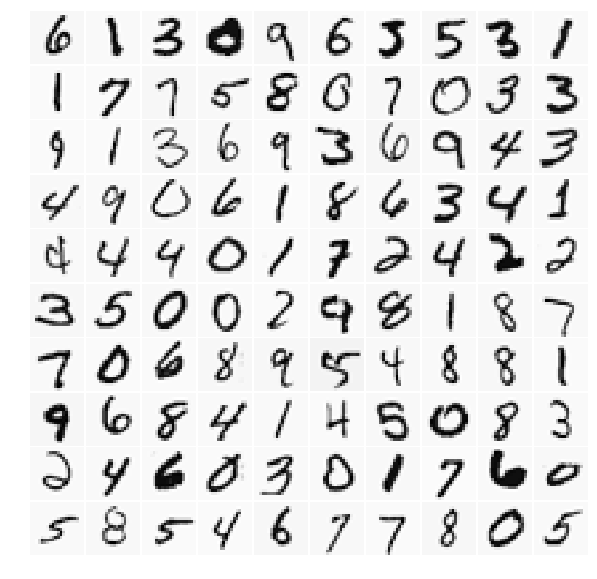

In [7]:
rand_indices=np.random.choice(m,100,replace=False)
sel=X[rand_indices,:]
displayData(sel)

In [8]:
theta_t=np.array([-2,-1,1,2],dtype=float)
X_t=np.concatenate([np.ones((5,1)),np.arange(1,16).reshape(5,3,order='F')/10.0],axis=1)
y_t=np.array([1,0,1,0,1])
lambda_t=3

In [9]:
def lrCostFunction(theta,X,y,lambda_):
    m=y.size
    if y.dtype==bool:
        y=y.astype(int)
    
    J=0
    grad=np.zeros(theta.shape)
    sig=sigmoid(X.dot(theta))
    error=sig-y
    logsig1=np.log(sig)
    logsig2=np.log(1-sig)
    temp=theta
    temp[0]=0
    J=-1/m*(y.T.dot(logsig1)+(1-y).T.dot(logsig2))+lambda_/(2*m)*(temp.T.dot(temp))
    grad=1/m*(error.dot(X))
    
    grad=grad+lambda_/m*temp
    
    return J, grad

In [10]:
J, grad = lrCostFunction(theta_t,X_t,y_t,lambda_t)
print(J, grad)

2.534819396109744 [ 0.14656137 -0.54855841  0.72472227  1.39800296]


In [11]:
from scipy import optimize

def oneVsAll(X,y,num_labels,lambda_):
    m,n=X.shape
    X=np.concatenate([np.ones((m,1)),X], axis=1)
    all_theta=np.zeros((num_labels,n+1))
    initial_theta = np.zeros(401)
    for c in range(num_labels):
        res=optimize.minimize(lrCostFunction, initial_theta, (X,(y==c),lambda_),jac=True, method='CG',options={'maxiter':50})
        all_theta[c]=res.x
    
    return all_theta

In [12]:
lambda_=0.1
all_theta=oneVsAll(X,y,num_labels,lambda_)
all_theta.shape

(10, 401)

In [13]:
def predictOneVsAll(all_theta,X):
    m=X.shape[0]
    num_labels=all_theta[0]
    p=np.zeros(m)
    X=np.concatenate([np.ones((m,1)),X],axis=1)
    prob=X.dot(all_theta.T)
    p=np.argmax(prob,axis=1)
    return p

In [14]:
pred=predictOneVsAll(all_theta,X)
print('Accuracy: {:.2f}%'.format(np.mean(pred==y)*100))

Accuracy: 95.18%
